# Import libraries

### General libraries

In [327]:
import numpy as np
import pandas as pd
from datetime import datetime
import time

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings("ignore")

### Pre proceesing libraries

In [328]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

### Modeling libraries

In [329]:
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# IMPORT DATA

When we first tried to load the csv file into a dataframe, we got this error 
"ParserError: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13"

Meaning that at row 3350, there is an extra column. We modified the file trough excel where we've noticed that the columns were shifted to the right. The same for the rows 4704,5879 and 8981  

In [330]:
# import book dataset from the folder where you store it.
# change the link below accordinlgy
df=pd.read_csv("C:/Users/romai/Documents/DSTI/4-Python Labs/Project/Python/dataset/books_v2.csv", index_col="bookID", on_bad_lines = 'error')

# EXPLORATORY DATA ANALYSIS
1. Describe the data
2. Look for missing values
3. Look for "weird" values (outliers? errors?)
4. Check if data are balanced (if not, model can be biaise

In [331]:
#Return first 5 rows of the dataset
df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780000e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780000e+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,352,6333,244,11/01/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780000e+12,eng,2690,41428,164,9/13/2004,Scholastic


**First observations:**
* **publication_date** have different formats (dd/mm/yyyy or mm/dd/yyy)
</br>

* **isbn and isbn13**: does a barcode can predict the ratings? 
In general, isbn are related to publication year and identification of book (information that we already have)
We strongly assume that a reader doesn't look at that information when he/she evaluates a book (neither to select a book in order to read it)
=> we decide to remove it from our future model 
</br>

* **Authors:**
There books with single author and others with multiple authors -> we could create a new column "Authors_2" = Single/Multiple -> boolean (see in Feature Engineerng part)

***

In [332]:
df.shape

(11127, 11)

In [333]:
df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

We can see a space upfront the column name "num_pages" => in Feature Engineering part, remove space upfront " num_pages"
***

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  float64
 5   language_code       11127 non-null  object 
 6     num_pages         11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.0+ MB


In [335]:
#Columns type
df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                float64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

**publication_date** is not a date format => we will change the format in Feature Engineering + split the information into 2 new ones: month and year (day of publication is not really useful for our problem)
***

In [336]:
#Is there any NA values in the dataset?
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [337]:
#check for row duplication
df.duplicated().sum()

0

No duplicate row but let's look (later) at title, authors, etc that could be repeated
***

In [338]:
#Exploring statistical summary for numerical columns and some information for non-numerical columns 
df.describe(include = "all")

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
count,11127,11127,11127.000000,11127,1.112700e+04,11127,11127.000000,1.112700e+04,11127.000000,11127,11127
unique,10352,6643,NaN,11127,NaN,27,NaN,NaN,NaN,3682,2292
top,The Brothers Karamazov,Stephen King,NaN,439785960,NaN,eng,NaN,NaN,NaN,10/01/2005,Vintage
freq,9,40,NaN,1,NaN,8911,NaN,NaN,NaN,56,318
mean,NaN,NaN,3.933631,NaN,9.759178e+12,NaN,336.376921,1.793641e+04,541.854498,NaN,NaN
std,NaN,NaN,0.352445,NaN,4.428650e+11,NaN,241.127305,1.124794e+05,2576.176608,NaN,NaN
min,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,NaN,NaN,3.770000,NaN,9.780000e+12,NaN,192.000000,1.040000e+02,9.000000,NaN,NaN
50%,NaN,NaN,3.960000,NaN,9.780000e+12,NaN,299.000000,7.450000e+02,46.000000,NaN,NaN
75%,NaN,NaN,4.135000,NaN,9.780000e+12,NaN,416.000000,4.993500e+03,237.500000,NaN,NaN


* Books with no pages (76 of them) -> how it's possible ? 

* **average_rating** equal to 0 is possible (check on Goodreads website simulationg a rating)

* **ratings_count** = 0 -> irrelevant if there is an average rating not null- set 1 as ratings_count since a rating of 0 is possible

* Unique **title** < total count -> duplicate titles - how to deal with that?

***

In [339]:
#What are the books that have 0 pages?  
pages = df['  num_pages']
df[pages == 0]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,802415318,9.780000e+12,eng,0,22,4,01/01/2005,Moody Publishers
2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9.780000e+12,eng,0,3,0,01/01/2003,Tantor Media
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,743564677,9.780000e+12,eng,0,7,2,10/03/2006,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9.780000e+12,eng,0,12,1,10/01/2003,Simon & Schuster Audio
4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,739339788,9.780000e+12,eng,0,91,16,3/28/2006,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...
40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9.780000e+12,eng,0,5147,157,01/01/2005,Tantor Media
41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,517164353,9.780000e+12,eng,0,17,4,11/19/1995,Random House Value Publishing
43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,671046241,9.780000e+12,eng,0,64,2,12/01/1999,Simon & Schuster Audio


In [340]:
df[df.authors == 'NOT A BOOK']


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,743564677,9.780000e+12,eng,0,7,2,10/03/2006,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9.780000e+12,eng,0,12,1,10/01/2003,Simon & Schuster Audio
19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,563388692,9.780000e+12,eng,2,3,0,04/01/1996,BBC Physical Audio
19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,563388544,9.780000e+12,eng,2,0,0,3/30/2005,BBC Physical Audio
19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,563388323,9.780000e+12,eng,2,2,0,10/02/1995,BBC Physical Audio


Investigation on Goodreads website showed those books are **Audio**.
Let's investigate if there are other audio book in the dataset

We assume that audio books are books with low number of pages (<30)

In [341]:
df['  num_pages'].value_counts().sort_index(axis = 0).head(30)

0     76
1     11
2     15
3     19
4     11
5     16
6     20
7      6
8     10
9     11
10    13
11     7
12    14
13     8
14    15
15     7
16    10
17     2
18     2
20     3
21     1
22     1
24    20
25     1
26     1
27     1
28     2
29     2
30     3
31     3
Name:   num_pages, dtype: int64

In [342]:
df[df['  num_pages'] == 1].head(15)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
12582,Essential Welty: Why I Live at the P.O. A Mem...,Eudora Welty,3.94,61124192,9.780000e+12,eng,1,92,28,6/27/2006,Caedmon
15330,The Return of the King (The Lord of the Rings ...,Brian Sibley/J.R.R. Tolkien,4.35,563536594,9.780000e+12,eng,1,17,3,03/04/2002,BBC Audiobooks Ltd
17872,Lobsters,Charles Stross/Shandra Marie/Jared Doreck,3.83,1884612466,9.780000e+12,eng,1,158,5,08/11/2005,AudioText
17873,Antibodies,Charles Stross/Shandra Marie/Jared Doreck,3.46,1884612474,9.780000e+12,eng,1,67,4,08/11/2005,AudioText
20971,Meditations for Manifesting: Morning and Eveni...,Wayne W. Dyer,4.02,156170315X,9.780000e+12,eng,1,338,12,06/01/1995,Hay House
21545,The Best American Mystery Stories 2003,Michael Connelly/Otto Penzler,3.60,618390723,9.780000e+12,eng,1,5,2,11/04/2003,Mariner Books
21703,The Best American Mystery Stories 2002,James Ellroy/Otto Penzler/John Biguenet/Michae...,3.58,618258078,9.780000e+12,eng,1,0,0,10/15/2002,Mariner Books
22337,The Neil Gaiman Audio Collection,Neil Gaiman,4.24,60732989,9.780000e+12,eng,1,1666,208,8/31/2004,HarperFestival
32668,LT's Theory of Pets,Stephen King,3.69,074352005X,9.780000e+12,eng,1,2824,140,08/01/2001,Simon Schuster Audio


* **Num_pages** from 0 to 15 tends to be Audio Books when we looked at some of them on Goodreads website

* **publisher** can have a name referring to audio books:</br>
"Books on Tape"</br>
"Tantor Media"-containing publisher name = AUDIO (note: pages <= 6)</br>
"Caedmon"-containing publisher name = AUDIO (note: pages <= 11)</br>
"HarperFestival"-containing publisher name = AUDIO (note: 1 "book" counts 31 pages but it's 31 CDs)</br>
"Pimsleur"-containing publisher name = AUDIO (note: only 1 book)</br>
"FonoLibro"-containing publisher name = AUDIO (note: only 1 book - 18 pages</br>
"Disney Press", Warne" AND "TSR Inc" publish short book for kids</br>
"Studio"-containing publisher name = only paper book - to keep</br>

=> create a new column AUDIBLE vs READABLE
***

## Target variable = average_rating

In [343]:
#describe our target variable average_rating and plot it
df.average_rating.describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

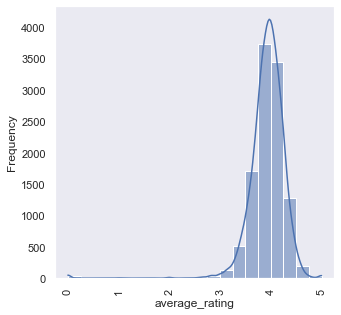

In [344]:
plt.figure(figsize=(5,5))
sns.histplot(df['average_rating'], kde = True, bins = 20, palette = "hls" )
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.grid()
plt.show

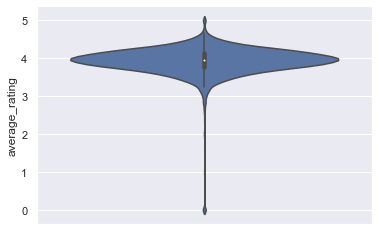

In [345]:
sns.set(style="darkgrid")
sns.violinplot(y=df["average_rating"])
plt.show()

In [346]:
#check the normality of the distribution
print(f"Skewness: {df['average_rating'].skew()}")
print(f"Kurtosis: {df['average_rating'].kurt()}")

Skewness: -3.638311410554902
Kurtosis: 36.721776547302916


We observe an **asymetry** in distribution with outliers:
* A **negative skewness** value in the output indicates an asymmetry in the distribution corresponding to row 2 and the tail is larger towards the left hand side of the distribution.

* **High kurtosis** in a data set is an indicator that data has heavy outliers. 

We decided to create 3 categories ([0-2]-[3]-[4-5]) and go with a **classification** model
***

### Top 10 published authors

<AxesSubplot:xlabel='authors'>

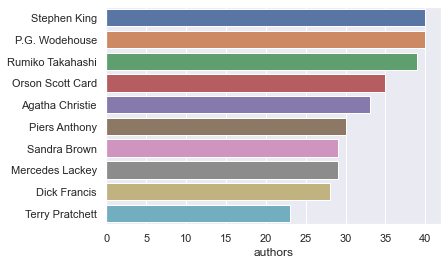

In [347]:
count_authors = df['authors'].value_counts().head(10)
sns.barplot(x = count_authors, y = count_authors.index)

### Top 5 languages

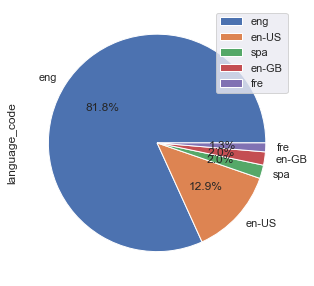

In [348]:
df['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(5, 5)).legend()

### "Duplicate" books

Several books are represented many times. It's explained by different published version.
However, whatever the publication version, all the features and target variable remain the same (except the publication date ;) )

<AxesSubplot:xlabel='title'>

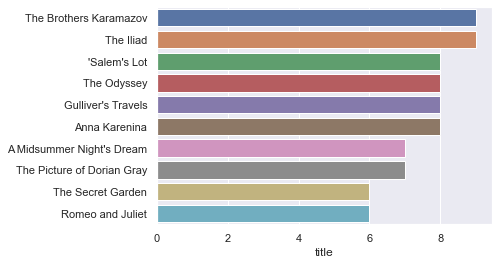

In [349]:
count_title = df.title.value_counts()[:10]
sns.barplot(x = count_title, y = count_title.index)

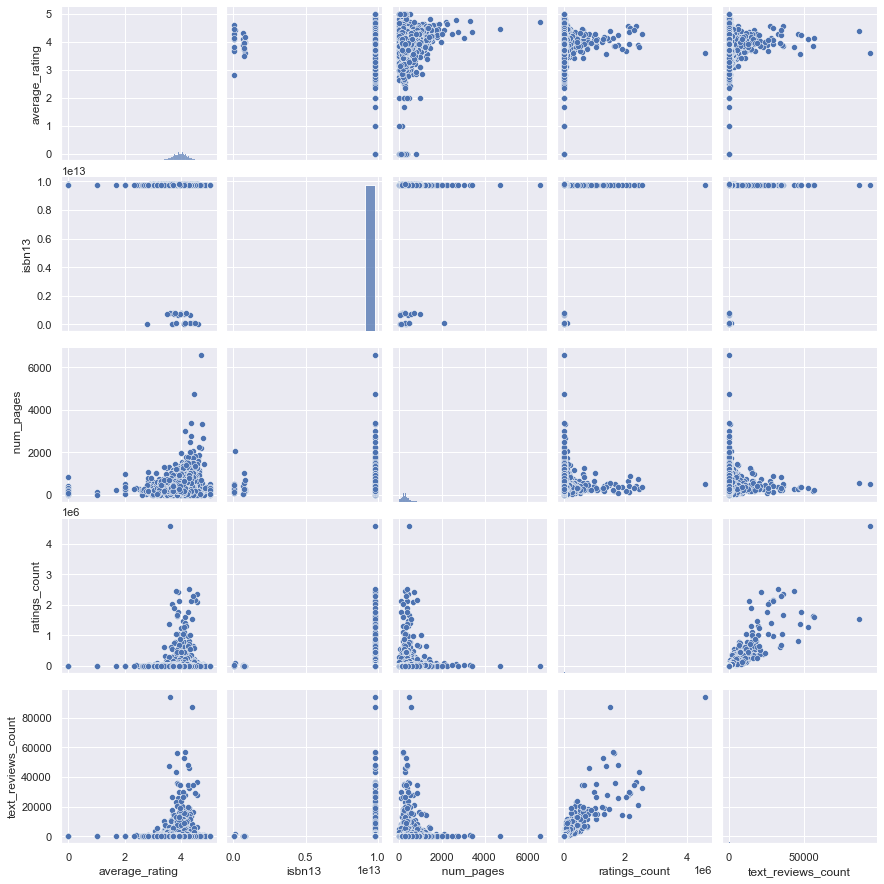

In [350]:
sns.pairplot(df) 

### Outliers

Let's look closer on num_pages, Text Reviews Count, ratings_count which have a high variability

In [351]:
#Checking for Outliers columns: num_pages, Text Reviews Count, ratings_count

fig = make_subplots(rows= 2, cols=2, subplot_titles=("Number of Pages", "Text-Reviews Count", 
                                                     "Ratings Count"))
# Number of Pages subplot
fig.add_trace(px.violin(df, y="  num_pages").data[0], row=1, col=1)

# Text-Reviews Count subplot
fig.add_trace(px.violin(df, y="text_reviews_count").data[0], row=1, col=2)

# Ratings ount violin subplot
fig.add_trace(px.violin(df, y="ratings_count").data[0], row=2, col=1)

fig.update_layout(title_text="Checking for Outliers", title_font_size=24, 
                  font_size=12, height=1000, width=1000, showlegend=True)
fig.show()

### Relationships between variables

In [352]:
#correlation
corr = df.corr()
corr

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,-0.002075,0.150809,0.038205,0.033734
isbn13,-0.002075,1.000000,-0.009680,0.005560,0.008232
num_pages,0.150809,-0.009680,1.000000,0.034353,0.036998
ratings_count,0.038205,0.005560,0.034353,1.000000,0.865979
text_reviews_count,0.033734,0.008232,0.036998,0.865979,1.000000


<AxesSubplot:>

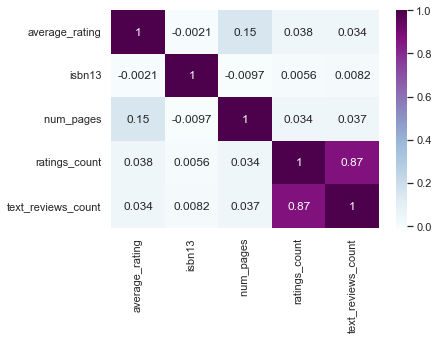

In [353]:
sns.heatmap(corr, cmap="BuPu", annot=True)

# Data Cleaning & Feature Engineering 

## Features

In [354]:
#Dropping useless columns: isbn and isbn13
df = df.drop(columns = ['isbn','isbn13'])

In [355]:
#Renaming '  num_pages' in order to remove the extra spaces and displaying columns names
df.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [356]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

### Publication date formatting
+create 2 new features: publication_month and publication_year

In [357]:
#Change the format of column "publication_date" 
df['publication_date'] = pd.to_datetime(df['publication_date'], dayfirst = False, yearfirst = False, errors = 'coerce')

In [358]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.


In [359]:
df.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

In [360]:
df.loc[df.publication_date.isna(),:]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,eng,718,10608,295,NaT,Bantam Books
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2,NaT,Folio histoire


Those 2 dates are unreal in the sense that
    # November doesn't have 31 days (11/31/2000)
    # June doesn't have 31 days (31/06/1982)
    
=> replace by correct date for those 2 rows

    #31373 published October 31, 2000 by Bantam Books (https://www.goodreads.com/book/show/31373.In_Pursuit_of_the_Proper_Sinner?ac=1&from_search=true&qid=3A5Zotzgsy&rank=1)
    
    #45531 published June 30, 1982 by Folio histoire (https://www.goodreads.com/book/show/45531.Montaillou_village_occitan_de_1294_1324)

In [361]:
#correcting 2 NaT by correct date
df.loc[31373,"publication_date"]='10/30/2000'
df.loc[45531,"publication_date"] ='6/30/1982'
df.loc[[31373,45531]]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,eng,718,10608,295,2000-10-30,Bantam Books
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2,1982-06-30,Folio histoire


In [362]:
# Splitting date column into month and year columns - move in FE
df['publication_month'] = df['publication_date'].dt.month
df['publication_year'] = df['publication_date'].dt.year


df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_year
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,9,2006
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,9,2004


In [363]:
#average rating evolution over the months
df.groupby(["publication_month"]).describe().average_rating

,count,mean,std,min,25%,50%,75%,max
publication_month,,,,,,,,
1,1058.0,3.935123,0.391895,0.0,3.79,3.970,4.14,5.00
2,742.0,3.939677,0.310352,2.0,3.78,3.960,4.13,5.00
3,832.0,3.917055,0.365252,0.0,3.78,3.940,4.11,5.00
4,993.0,3.914642,0.321800,0.0,3.76,3.950,4.12,5.00
5,923.0,3.891863,0.394633,0.0,3.75,3.930,4.10,5.00
6,880.0,3.957250,0.325422,0.0,3.78,3.965,4.16,5.00
7,786.0,3.915165,0.349827,0.0,3.76,3.940,4.12,5.00
8,853.0,3.922626,0.349353,0.0,3.77,3.950,4.12,4.62
9,1278.0,3.954734,0.349687,0.0,3.79,3.970,4.14,5.00


<AxesSubplot:xlabel='publication_month', ylabel='average_rating'>

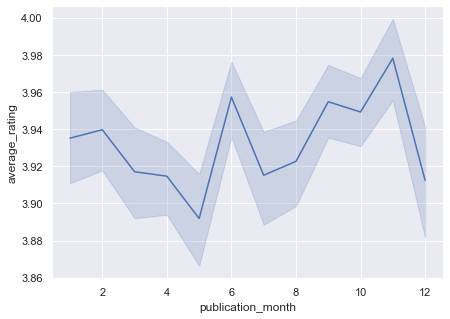

In [364]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
sns.lineplot(x="publication_month", y="average_rating", data=df)
# better rating around end of the year

<AxesSubplot:xlabel='publication_year', ylabel='average_rating'>

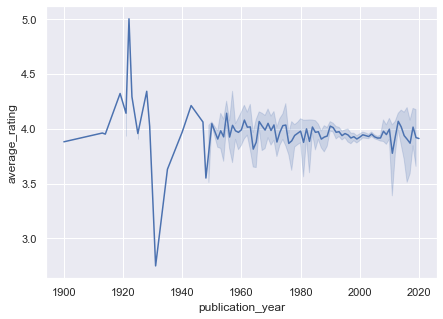

In [365]:
# Average rating over the years
fig = plt.gcf()
fig.set_size_inches(7, 5)
sns.lineplot(x="publication_year", y="average_rating", data=df)

### Language grouping

In [366]:
#language grouping
df.language_code.value_counts()

eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [367]:
#step 1: group en-us, en-GB and en-CA under 1 language code (eng)
df.language_code = df.language_code.replace({'en-US':'eng', 'en-GB':'eng', 'en-CA':'eng'})

#step 2: groups of language: english (eng) vs other
df['language_code'] = np.where(df['language_code'] != 'eng', 'other', 'eng')

### Authors

In [368]:
# create 2 new columns related to author in order to simplify features:
# number_of_authors: single author vs multiple authors -> Single/Multiple -> boolean
df['number_of_authors']=np.where(df['authors'].str.split(pat="/").str.len()==1, "single", "multiple")

#primary_authror: keep 1st author in case of multiple authors
df['primary_author']=df['authors'].str.split(pat="/").str[0]

df.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_year,number_of_authors,primary_author
bookID,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,9,2006,multiple,J.K. Rowling
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,9,2004,multiple,J.K. Rowling
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic,11,2003,single,J.K. Rowling


In [369]:
df.groupby(["number_of_authors"]).describe().average_rating

,count,mean,std,min,25%,50%,75%,max
number_of_authors,,,,,,,,
multiple,4564.0,3.964963,0.357029,0.0,3.8075,3.99,4.17,5.0
single,6563.0,3.911842,0.347588,0.0,3.7500,3.94,4.11,5.0


A bit more books with multiple authors but average_rating quite similar
***

How many books per author? Can we create a new feature (author_total_book)

In [370]:
author=df.groupby('primary_author').agg({'average_rating':['count','mean'], 'num_pages':['mean']})
author.columns = [" ".join(x) for x in author.columns.ravel()]
author

,average_rating count,average_rating mean,num_pages mean
primary_author,,,
A.B. Yehoshua,2,3.600000,416.000000
A.D.P. Briggs,1,3.760000,256.000000
A.E. Cunningham,1,4.150000,232.000000
A.J. Jacobs,1,3.760000,389.000000
A.M. Homes,1,3.280000,256.000000
...,...,...,...
Zoë Heller,2,3.710000,251.000000
bell hooks,6,4.230000,188.000000
Åsne Seierstad,3,3.763333,291.333333


In [371]:
author_dict=df.groupby('primary_author').average_rating.count().to_dict()

for author in author_dict.keys():
    author_index = df.loc[(df.primary_author == author),:].index
    df.loc[author_index,"author_total_book"] = author_dict[author]

df.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_year,number_of_authors,primary_author,author_total_book
bookID,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,9,2006,multiple,J.K. Rowling,24.0
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,9,2004,multiple,J.K. Rowling,24.0
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic,11,2003,single,J.K. Rowling,24.0


### Title

Let's create a new feature: title_len (= length of the title)

In [372]:
df['title_len']=df['title'].str.len()

In [373]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_year,number_of_authors,primary_author,author_total_book,title_len
bookID,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,9,2006,multiple,J.K. Rowling,24.0,57
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,9,2004,multiple,J.K. Rowling,24.0,60


## Target variable

### Average rating categorization

In [374]:
# create 3 categories Low < 3, Mid between 3 and 4 (excl) and high above 4 (5.001 to include the rating = 5)
bins = [ 0,3, 4, 5.001]
label = [0, 1, 2]
df['cat_rating'] = pd.cut(df['average_rating'], bins, labels=label, right = False)

In [375]:
df.groupby(["cat_rating"]).count().average_rating

cat_rating
0      85
1    6088
2    4954
Name: average_rating, dtype: int64

**=>Imbalanced data** between Low and Mid / High - => SMOTE and undersampling required :)

In [376]:
df.cat_rating.dtypes

CategoricalDtype(categories=[0, 1, 2], ordered=True)

Type of the target variable should be change to allow the execution of some models

### average_rating vs ratings_counts & text_reviews_counts

In [377]:
print('Number of average_rating = 0: ', df['average_rating'].value_counts()[0])
print('Number of rating_counts = 0: ', df['ratings_count'].value_counts()[0])
print('Number of text_reviews_count = 0: ', df['text_reviews_count'].value_counts()[0])


Number of average_rating = 0:  26
Number of rating_counts = 0:  81
Number of text_reviews_count = 0:  625


In [378]:
df[df.average_rating==0].loc[df.text_reviews_count!=0]
#1 text review but no rating associated (ratings count =0)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_year,number_of_authors,primary_author,author_total_book,title_len,cat_rating
bookID,,,,,,,,,,,,,,,,
41044,Day and Night,Better Homes and Gardens,0.0,eng,32,0,1,1989-03-01,Meredith Corporation,3,1989,single,Better Homes and Gardens,1.0,13,0


* Rating = 0 with rating_count = 0 (n=26) -> is it relevant to keep it or should we replace by the average rating?
* Average_rating != 0 but no ratings_count or texte_reviews_count? how to consider them

=> We keep those 26 rows modifying values in ratings_counts by 1 (rate of 0 is possible <=> at least 1 ratings_count
***

In [379]:
df.loc[(df['ratings_count']== 0) & (df['average_rating']==0), 'ratings_count'] = 1

In [380]:
print('Number of average_rating = 0: ', df['average_rating'].value_counts()[0])
print('Number of rating_counts = 0: ', df['ratings_count'].value_counts()[0]) #80-26=54
print('Number of text_reviews_count = 0: ', df['text_reviews_count'].value_counts()[0])#622-26+1 ( text review=1)= 600

Number of average_rating = 0:  26
Number of rating_counts = 0:  55
Number of text_reviews_count = 0:  625


We have still 55 rating_count equal to 0 whereas we have an average_rating at least equal to 1 => how can we have a rating without any count? <br>


In [381]:
df[df.ratings_count==0].head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_year,number_of_authors,primary_author,author_total_book,title_len,cat_rating
bookID,,,,,,,,,,,,,,,,
797,Lonely Planet Londres,Lonely Planet/Sarah Johnstone/Tom Masters,4.03,other,480,0,0,2006-05-01,Geoplaneta,5,2006,multiple,Lonely Planet,3.0,21,2
1658,American Government: Continuity and Change Al...,Karen O'Connor/Larry J. Sabato,2.83,eng,664,0,0,2005-03-11,Longman Publishing Group,3,2005,multiple,Karen O'Connor,5.0,61,0
1664,Essentials of American and Texas Government: C...,Karen O'Connor/Larry J. Sabato,3.50,eng,854,0,0,2005-07-29,Longman Publishing Group,7,2005,multiple,Karen O'Connor,5.0,66,1


We decide to replace ratings_counts = 0 by average ratings_counts of the corresponding rating category

In [382]:
avg_count = df.groupby(["cat_rating"]).mean().ratings_count.to_dict()
print(avg_count)

check= df.loc[7400].ratings_count

for rate in avg_count.keys():
    temp_df = df.loc[(df.cat_rating == rate),:]
    missing_values_index = temp_df.loc[temp_df.ratings_count == 0].index
    df.loc[missing_values_index,"ratings_count"] = avg_count[rate]

print ('\n ID7400 before:',check)
print ('\n ID7400 after:',df.loc[7400].ratings_count)

{0: 768.5176470588235, 1: 15089.132720105124, 2: 21730.01332256762}

 ID7400 before: 0

 ID7400 after: 15089.132720105124


New feature: **text_review_rate** which represents the rate of comments let by reader

In [383]:
df['text_review_rate']=df['text_reviews_count']/df['ratings_count']
df.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_year,number_of_authors,primary_author,author_total_book,title_len,cat_rating,text_review_rate
bookID,,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690.0,27591,2006-09-16,Scholastic Inc.,9,2006,multiple,J.K. Rowling,24.0,57,2,0.013166
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167.0,29221,2004-09-01,Scholastic Inc.,9,2004,multiple,J.K. Rowling,24.0,60,2,0.013571
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333.0,244,2003-11-01,Scholastic,11,2003,single,J.K. Rowling,24.0,58,2,0.038528


## Pre-processing of features and target

### Encoding of categorical data

In [384]:
labelencoder = LabelEncoder()
df['language_cat'] = labelencoder.fit_transform(df['language_code'])

df["co-author"] = df['number_of_authors'].replace({'single': 0, 'multiple': 1})

df['author_cat'] = labelencoder.fit_transform(df['primary_author'])

df['cat_rating'] = labelencoder.fit_transform(df['cat_rating'])

In [385]:
df.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_year,number_of_authors,primary_author,author_total_book,title_len,cat_rating,text_review_rate,language_cat,co-author,author_cat
bookID,,,,,,,,,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690.0,27591,2006-09-16,Scholastic Inc.,9,2006,multiple,J.K. Rowling,24.0,57,2,0.013166,0,1,1600
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167.0,29221,2004-09-01,Scholastic Inc.,9,2004,multiple,J.K. Rowling,24.0,60,2,0.013571,0,1,1600
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333.0,244,2003-11-01,Scholastic,11,2003,single,J.K. Rowling,24.0,58,2,0.038528,0,0,1600


# Modeling

### Datasets (train/test)

In [386]:
df_processed=df.drop(columns=['title','authors', 'average_rating', 'number_of_authors', 'language_code','publication_date', 'publisher','primary_author'])

In [387]:
df_processed.head(3)

,num_pages,ratings_count,text_reviews_count,publication_month,publication_year,author_total_book,title_len,cat_rating,text_review_rate,language_cat,co-author,author_cat
bookID,,,,,,,,,,,,
1,652,2095690.0,27591,9,2006,24.0,57,2,0.013166,0,1,1600
2,870,2153167.0,29221,9,2004,24.0,60,2,0.013571,0,1,1600
4,352,6333.0,244,11,2003,24.0,58,2,0.038528,0,0,1600


In [388]:
df_train, df_test = train_test_split(df_processed ,test_size = 0.3, random_state = 63)

In [389]:
features = ['num_pages', 'ratings_count', 'text_reviews_count', 'publication_month', 'publication_year',
            'language_cat','author_total_book','author_cat','text_review_rate', 'title_len']

X_train = df_train.loc[:,features]
y_train = df_train.cat_rating

X_test = df_test.loc[:,features]
y_test = df_test.cat_rating

### Sampling rebalancing

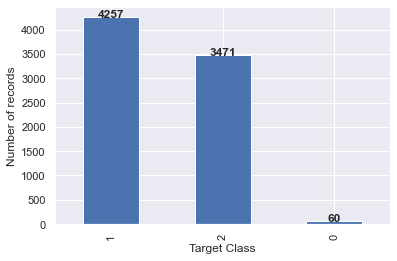

In [390]:
#plot the class size before resampling
count = y_train.value_counts()
ax=count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2., height + 0.5, f'{height:.0f}', ha='center', fontweight='bold')

plt.show()

In [391]:
count = y_train.value_counts()
n_samples = np.int64(y_train.value_counts().median())

print(count)
print('\n Median is: ', n_samples)

1    4257
2    3471
0      60
Name: cat_rating, dtype: int64

 Median is:  3471


Based on the median, the sample strategy for undersampling and oversampling will be the following:
* over sampling: 0.95*3400
* undersampling: 1.05 * 3400

In [392]:
over_strategy={0: 3060}
under_strategy={1: 3740, 2: 3670}

In [393]:
over=SMOTE(sampling_strategy=over_strategy, k_neighbors=7, random_state=63)
X_over, y_over = over.fit_resample(X_train, y_train)

X_over_df= pd.DataFrame(X_over)
y_over_df= pd.DataFrame(y_over)

In [394]:
under = RandomUnderSampler(sampling_strategy=under_strategy, random_state=63)

X_train_balanced, y_train_balanced = over.fit_resample(X_over_df, y_over_df)

### Modelization

Logistic Regression
Confusion Matrix:
[[  16    6    3]
 [ 578 1025  228]
 [ 392  739  352]]

Classification Report
              precision    recall  f1-score   support

           0       0.02      0.64      0.03        25
           1       0.58      0.56      0.57      1831
           2       0.60      0.24      0.34      1483

    accuracy                           0.42      3339
   macro avg       0.40      0.48      0.31      3339
weighted avg       0.59      0.42      0.46      3339



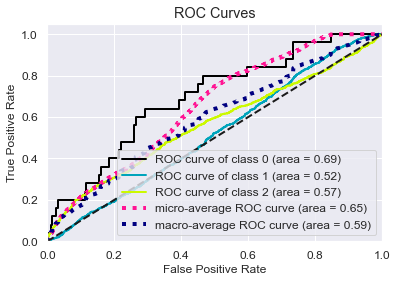


Execution time:  0.3048861026763916 

K-Nearest Neighbor
Confusion Matrix:
[[  11   11    3]
 [ 272 1025  534]
 [ 165  704  614]]

Classification Report
              precision    recall  f1-score   support

           0       0.02      0.44      0.05        25
           1       0.59      0.56      0.57      1831
           2       0.53      0.41      0.47      1483

    accuracy                           0.49      3339
   macro avg       0.38      0.47      0.36      3339
weighted avg       0.56      0.49      0.52      3339



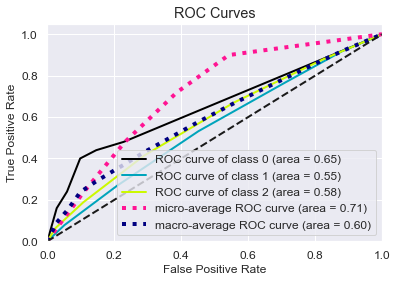


Execution time:  0.3164694309234619 

Decision Tree
Confusion Matrix:
[[   8   13    4]
 [  83 1091  657]
 [  37  660  786]]

Classification Report
              precision    recall  f1-score   support

           0       0.06      0.32      0.10        25
           1       0.62      0.60      0.61      1831
           2       0.54      0.53      0.54      1483

    accuracy                           0.56      3339
   macro avg       0.41      0.48      0.42      3339
weighted avg       0.58      0.56      0.57      3339



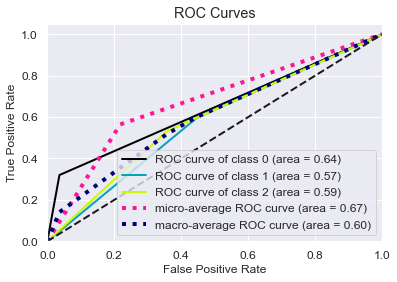


Execution time:  0.21281766891479492 

Random Forest
Confusion Matrix:
[[  10   14    1]
 [  32 1363  436]
 [  22  664  797]]

Classification Report
              precision    recall  f1-score   support

           0       0.16      0.40      0.22        25
           1       0.67      0.74      0.70      1831
           2       0.65      0.54      0.59      1483

    accuracy                           0.65      3339
   macro avg       0.49      0.56      0.51      3339
weighted avg       0.65      0.65      0.65      3339



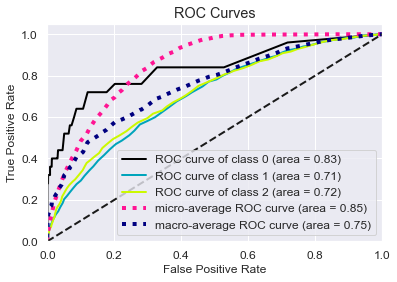


Execution time:  1.8050827980041504 

Extra Tree Classifier
Confusion Matrix:
[[   6   15    4]
 [  31 1403  397]
 [  16  686  781]]

Classification Report
              precision    recall  f1-score   support

           0       0.11      0.24      0.15        25
           1       0.67      0.77      0.71      1831
           2       0.66      0.53      0.59      1483

    accuracy                           0.66      3339
   macro avg       0.48      0.51      0.48      3339
weighted avg       0.66      0.66      0.65      3339



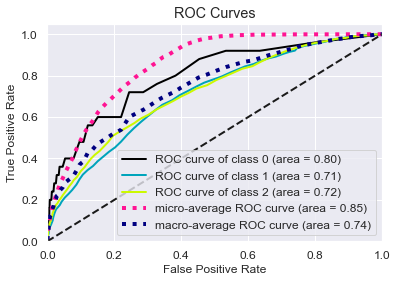


Execution time:  1.1156857013702393 

Gradient Boosting Classifier
Confusion Matrix:
[[  14   10    1]
 [  78 1353  400]
 [  62  698  723]]

Classification Report
              precision    recall  f1-score   support

           0       0.09      0.56      0.16        25
           1       0.66      0.74      0.70      1831
           2       0.64      0.49      0.55      1483

    accuracy                           0.63      3339
   macro avg       0.46      0.60      0.47      3339
weighted avg       0.65      0.63      0.63      3339



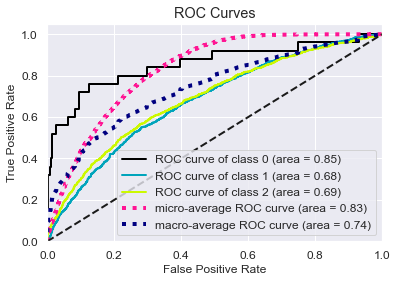


Execution time:  5.171231746673584 

MPL Classifier
Confusion Matrix:
[[   8   16    1]
 [ 150 1553  128]
 [  99 1179  205]]

Classification Report
              precision    recall  f1-score   support

           0       0.03      0.32      0.06        25
           1       0.57      0.85      0.68      1831
           2       0.61      0.14      0.23      1483

    accuracy                           0.53      3339
   macro avg       0.40      0.44      0.32      3339
weighted avg       0.58      0.53      0.47      3339



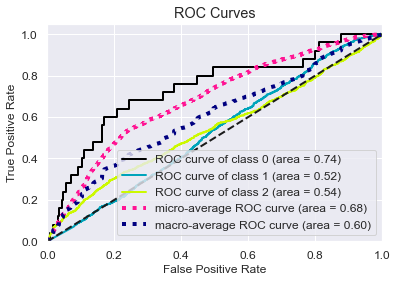


Execution time:  0.8082461357116699 

XGB Classifier
Confusion Matrix:
[[   8   15    2]
 [  17 1345  469]
 [  13  630  840]]

Classification Report
              precision    recall  f1-score   support

           0       0.21      0.32      0.25        25
           1       0.68      0.73      0.70      1831
           2       0.64      0.57      0.60      1483

    accuracy                           0.66      3339
   macro avg       0.51      0.54      0.52      3339
weighted avg       0.66      0.66      0.66      3339



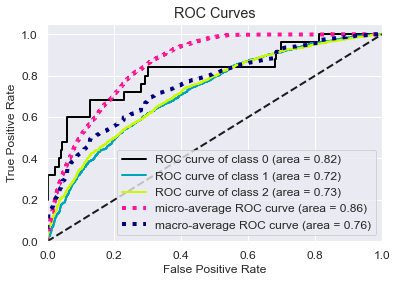


Execution time:  1.0296595096588135 



In [395]:
models = [LogisticRegression(random_state = 63),
          KNeighborsClassifier(), 
          DecisionTreeClassifier(), 
          RandomForestClassifier(random_state = 63),
          ExtraTreesClassifier(random_state = 63),
          GradientBoostingClassifier(random_state = 63),
          MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000),
          XGBClassifier(random_state = 63)]

names = ["Logistic Regression", "K-Nearest Neighbor",
         "Decision Tree", "Random Forest", "Extra Tree Classifier",
         "Gradient Boosting Classifier", "MPL Classifier", "XGB Classifier"]


# evaluate pipeline
for model, name in zip(models, names):
    start = time.time()
    model.fit(X_train_balanced, y_train_balanced)
    predictions = model.predict(X_test)
    y_score = model.predict_proba(X_test)
    
    print ('\033[1m'+name+'\033[0m')

    #print("ROC AUC:")
    #print(roc_auc_score(y_test, predictions))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print()
    print("Classification Report")
    print(classification_report(y_test, predictions))
    
    
    plot_roc(y_test, y_score)
    plt.show()
             
       
    print('\nExecution time: ', time.time() - start, '\n')

#### Conclusion on modelisation
Extra Tree Classifier, Random Forest and XGB have the "highest" accuracy but low (0.65-0.63-0.65)
The Data scaling doesn't improve the model
We need to improve those 2 models (play with features, tune hyperparameters and test without outliers -  results not shown)
***

#### Features tuning
(only the best option is presented)

In [396]:
df_processed=df.drop(columns=['title','authors', 'average_rating', 'number_of_authors', 'language_code','publication_date', 'publisher','primary_author'])

df_train, df_test = train_test_split(df_processed ,test_size = 0.3, random_state = 63)

In [397]:
features = ['num_pages', 'ratings_count',
            'author_cat', 'text_review_rate','author_total_book','title_len']


X_train = df_train.loc[:,features]
y_train = df_train.cat_rating

X_test = df_test.loc[:,features]
y_test = df_test.cat_rating

In [398]:
over_strategy={0: 3060}
under_strategy={1: 3740, 2: 3670}

over=SMOTE(sampling_strategy=over_strategy, k_neighbors=7, random_state=63)
X_over, y_over = over.fit_resample(X_train, y_train)

X_over_df= pd.DataFrame(X_over)
y_over_df= pd.DataFrame(y_over)

under = RandomUnderSampler(sampling_strategy=under_strategy, random_state=63)

X_train_balanced, y_train_balanced = over.fit_resample(X_over_df, y_over_df)

 Features :
 ['num_pages', 'ratings_count', 'author_cat', 'text_review_rate', 'author_total_book', 'title_len'] 

 Random Forest
 Confusion Matrix:
[[  10   14    1]
 [  25 1362  444]
 [  25  639  819]]

 Classification Report
              precision    recall  f1-score   support

           0       0.17      0.40      0.24        25
           1       0.68      0.74      0.71      1831
           2       0.65      0.55      0.60      1483

    accuracy                           0.66      3339
   macro avg       0.50      0.57      0.51      3339
weighted avg       0.66      0.66      0.65      3339



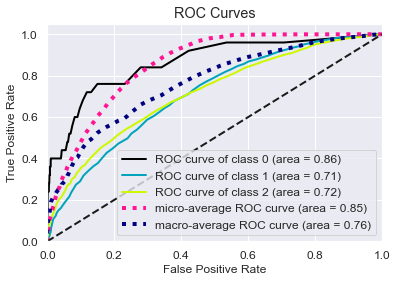


Features importance: 
 num_pages            0.148549
ratings_count        0.268687
author_cat           0.148806
text_review_rate     0.154767
author_total_book    0.155040
title_len            0.124151
dtype: float64

Execution time:  1.5905611515045166 

 Extra Tree Classifier
 Confusion Matrix:
[[   9   14    2]
 [  36 1361  434]
 [  27  626  830]]

 Classification Report
              precision    recall  f1-score   support

           0       0.12      0.36      0.19        25
           1       0.68      0.74      0.71      1831
           2       0.66      0.56      0.60      1483

    accuracy                           0.66      3339
   macro avg       0.49      0.55      0.50      3339
weighted avg       0.67      0.66      0.66      3339



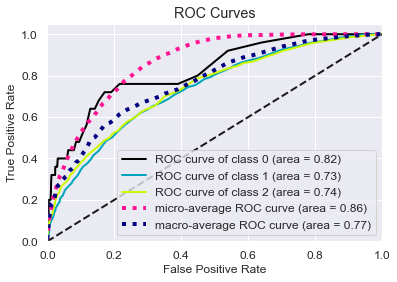


Features importance: 
 num_pages            0.160394
ratings_count        0.156420
author_cat           0.166581
text_review_rate     0.183127
author_total_book    0.179200
title_len            0.154278
dtype: float64

Execution time:  1.0275294780731201 

 XGB Classifier
 Confusion Matrix:
[[   9   13    3]
 [  18 1363  450]
 [  23  607  853]]

 Classification Report
              precision    recall  f1-score   support

           0       0.18      0.36      0.24        25
           1       0.69      0.74      0.71      1831
           2       0.65      0.58      0.61      1483

    accuracy                           0.67      3339
   macro avg       0.51      0.56      0.52      3339
weighted avg       0.67      0.67      0.67      3339



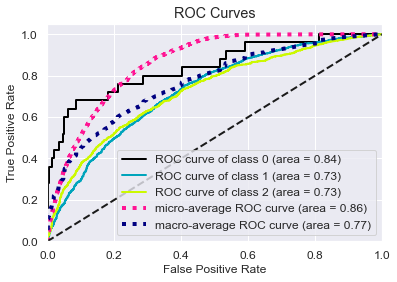


Features importance: 
 num_pages            0.103344
ratings_count        0.302819
author_cat           0.104471
text_review_rate     0.107006
author_total_book    0.282583
title_len            0.099777
dtype: float32

Execution time:  1.042309284210205 



In [400]:
models = [RandomForestClassifier(random_state = 63),
          ExtraTreesClassifier(random_state = 63),
          XGBClassifier(random_state = 63)]

names = ["Random Forest", "Extra Tree Classifier", "XGB Classifier"]
# evaluate pipeline

print ('\033[1m Features \033[0m:\n',features, '\n')

for model, name in zip(models, names):
    start = time.time()
    model.fit(X_train_balanced, y_train_balanced)
    predictions = model.predict(X_test)
    y_score = model.predict_proba(X_test)
    
    print (' \033[1m'+name+'\033[0m')

    print(" Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print()
    print(" Classification Report")
    print(classification_report(y_test, predictions))
    
    
    plot_roc(y_test, y_score)
    plt.show()
         
    
    model_importances = pd.Series(model.feature_importances_, index=features)
    print('\n\033[4mFeatures importance:\033[0m \n', model_importances)
    
    
    print('\nExecution time: ', time.time() - start, '\n')

#### Hyperparameters tuning  (XG Boost Classifier)

 Features :
 ['ratings_count', 'author_total_book'] 

Logistic Regression
Confusion Matrix:
[[  12    7    6]
 [  19 1342  470]
 [  30  918  535]]

Classification Report
              precision    recall  f1-score   support

           0       0.20      0.48      0.28        25
           1       0.59      0.73      0.65      1831
           2       0.53      0.36      0.43      1483

    accuracy                           0.57      3339
   macro avg       0.44      0.52      0.45      3339
weighted avg       0.56      0.57      0.55      3339



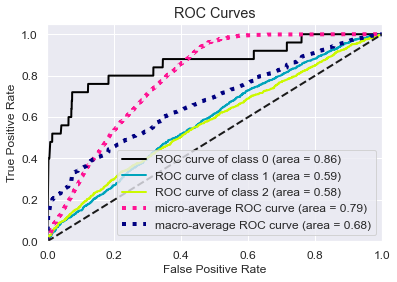


Features importance: 
 ratings_count        0.4707
author_total_book    0.5293
dtype: float32

Execution time:  0.8066036701202393 



In [325]:
model= XGBClassifier(random_state = 63)

names = "XGB Classifier"

# evaluate pipeline
print ("\033[1m Features \033[0m:\n", features, '\n')


start = time.time()
model.fit(X_train_balanced, y_train_balanced)
predictions = model.predict(X_test)
y_score = model.predict_proba(X_test)

print ('\033[1m'+name+'\033[0m')

#print("ROC AUC:")
#print(roc_auc_score(y_test, predictions))
    
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

  
plot_roc(y_test, y_score)
plt.show()
       
model_importances = pd.Series(model.feature_importances_, index=features)
print('\n\033[4mFeatures importance:\033[0m \n', model_importances)
    
print('\nExecution time: ', time.time() - start, '\n')

In [235]:
print ("List of XGBoost hyperparameters are: \n",model.get_xgb_params())

List of XGBoost hyperparameters are: 
 {'objective': 'multi:softprob', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 63, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [233]:
params = {'max_depth': [3, 6, 10, 15],
                  'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
                  'subsample': np.arange(0.5, 1.0, 0.1),
                  'colsample_bytree': np.arange(0.5, 1.0, 0.1),
                  'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
                  'n_estimators': [100, 250, 500, 750],
                  'num_class': [10]
                  }

xgbclf = xgb.XGBClassifier(objective="multi:softpro", tree_method='exact')

clf = RandomizedSearchCV(estimator=xgbclf,
                                 param_distributions=params,
                                 scoring='accuracy',
                                 n_iter=50,
                                 n_jobs=4,
                                 verbose=1)

clf.fit(X_train_balanced, y_train_balanced)

best_combination = clf.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


***
We relaunch the model with the "best" parameters obtained in order to see if performance is better

 Features :
 ['num_pages', 'ratings_count', 'author_cat', 'text_review_rate', 'author_total_book', 'title_len'] 

XGB Classifier
Confusion Matrix:
[[   9   14    2]
 [  12 1360  459]
 [  14  589  880]]

Classification Report
              precision    recall  f1-score   support

           0       0.26      0.36      0.30        25
           1       0.69      0.74      0.72      1831
           2       0.66      0.59      0.62      1483

    accuracy                           0.67      3339
   macro avg       0.54      0.57      0.55      3339
weighted avg       0.67      0.67      0.67      3339



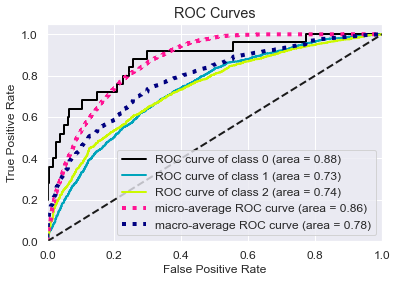


  Features importance:  
 num_pages            0.118468
ratings_count        0.217049
author_cat           0.124505
text_review_rate     0.135264
author_total_book    0.290397
title_len            0.114318
dtype: float32

Execution time:  3.595644235610962 



In [402]:
model= XGBClassifier(booster ='gbtree',objective="multi:softpro", tree_method='exact', subsample= 0.9, num_class= 10, 
                     n_estimators=250, max_depth= 10, learning_rate= 0.2, colsample_bytree= 0.9, 
                     colsample_bylevel= 0.8,random_state = 63)

names = "XGB Classifier"

# evaluate pipeline
print ("\033[1m Features \033[0m:\n", features, '\n')


start = time.time()
model.fit(X_train_balanced, y_train_balanced)
predictions = model.predict(X_test)
y_score = model.predict_proba(X_test)

print ('\033[1m'+name+'\033[0m')

    
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

plot_roc(y_test, y_score)
plt.show()
       
model_importances = pd.Series(model.feature_importances_, index=features)
print('\n \033[1m Features importance: \033[0m \n', model_importances)
    

print('\nExecution time: ', time.time() - start, '\n')

Hyperparameters tuning did not improve the performance of our model

# APPENDIXES

## Publisher

In [18]:
from fuzzywuzzy import process, fuzz

In [19]:
pub = df.publisher.unique()
elements = list(pub)
# elements = ['vikash', 'vikas', 'Vinod', 'Vikky', 'Akash', 'Vinodh', 'Sachin', 'Salman', 'Ajay', 'Suchin', 'vIkas', 'salman', 'salMa', 'Akash', 'vikahs']

results = [[name, [], 0] for name in elements]

for (i, element) in enumerate(elements):
    for (j, choice) in enumerate(elements[i+1:]):
        if fuzz.ratio(element, choice) >= 90:
            results[i][2] += 1
            results[i][1].append(choice)
            results[j+i+1][2] += 1
            results[j+i+1][1].append(element)

data = pd.DataFrame(results, columns=['name', 'duplicates', 'duplicate_count'])

data = data.sort_values(by=['duplicate_count'],ascending=False)

In [208]:
to_remove = []
test = {}

for i,j in data.iterrows():
    if data.name[i] in list(test.keys()):
        for x in j.duplicates:
            if x not in test : 
                test[x]=test[data.name[i]]
    else : 
        test[data.name[i]] = data.name[i]
        for x in j.duplicates:
            if x not in test : 
                test[x]=data.name[i]
#                 print(data.name[i], "****", x,"--" , data.name[i])
        
                    
# print(test)
data['pub'] = data['name'].map(test)
display(data)

,name,duplicates,duplicate_count,pub
102,W. W. Norton & Company,"[W. W. Norton Company, W.W. Norton & Company,...",4,W. W. Norton & Company
815,W.W. Norton Company,"[W. W. Norton & Company, W. W. Norton Company...",4,W. W. Norton & Company
120,W. W. Norton Company,"[W. W. Norton & Company, W.W. Norton & Company...",4,W. W. Norton & Company
1722,Farrar Straus & Giroux,"[Farrar Straus and Giroux, Farrar Straus Giro...",3,Farrar Straus & Giroux
1419,W. W. Norton and Company,"[W. W. Norton & Company, W. W. Norton Company...",3,W. W. Norton & Company
...,...,...,...,...
825,Albury Publishing,[],0,Albury Publishing
824,Little Brown Young Readers,[],0,Little Brown Young Readers
823,Random House Value Publishing,[],0,Random House Value Publishing
822,Holt McDougal,[],0,Holt McDougal


### Audible/readable

Create new column "Type" with 2 categories: AUDIBLE or READABLE
* 1. Select title with CD
* 2. Apply on publisher based on the list ["Audio", "Record", "Sound", "Tape", "Tantor", "Warner Adult", "HarperFestival","Pimsleur", "FonoLibro"]
* 3. Apply on num_pages <=15 (assumption that all books with less (or equal) than 15 pages are Audio)

In [ ]:
keep= ["Audio", "Record", "Sound", "Tape", "Tantor", "Warner Adult", "HarperFestival","Pimsleur", "FonoLibro"]
conditions = [df.authors == 'NOT A BOOK', df.title.str.contains('|'.join(["CD"])), df.publisher.str.contains('|'.join(keep)), df.num_pages <= 15]
choices =['audible','audible', 'audible','audible']                                                                                  
df['type'] = np.select(conditions, choices, default="readable")                                                                             

In [ ]:
df.head(11)

In [ ]:
df.groupby(["type"]).describe().average_rating

### Outliers handling

We used the IQR method to remove outliers.
We tested our models without outliers but it didn't improve models performance.
Therefore, we keep the full dataset for our final model

#### Pages

In [212]:
percentile25 = df['num_pages'].quantile(0.25)
percentile75 = df['num_pages'].quantile(0.75)
iqr = percentile75 - percentile25
print ("IQR: ",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df_no_outliers  = df[df['num_pages']< upper_limit]

IQR:  224.0


#### Ratings count

In [213]:
percentile25_rating = df_no_outliers['ratings_count'].quantile(0.25)
percentile75_rating = df_no_outliers['ratings_count'].quantile(0.75)
iqr2 = percentile75_rating - percentile25_rating
print ("IQR: ",iqr2)
upper_limit_rating = percentile75_rating + 1.5 * iqr2
lower_limit_rating = percentile25_rating - 1.5 * iqr2
df_no_outliers = df_no_outliers[df_no_outliers['ratings_count']< upper_limit_rating] 

IQR:  5033.0


#### Text reviews count

In [214]:
percentile25_text = df_no_outliers['text_reviews_count'].quantile(0.25)
percentile75_text = df_no_outliers['text_reviews_count'].quantile(0.75)
iqr3 = percentile75_text - percentile25_text
print ("IQR: ",iqr3)
upper_limit_text = percentile75_text + 1.5 * iqr3
lower_limit_text = percentile25_text - 1.5 * iqr3
df_no_outliers  = df_no_outliers[df_no_outliers ['text_reviews_count']< upper_limit_text]

IQR:  103.0


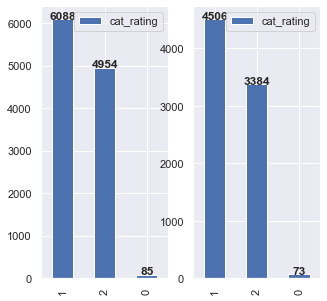

In [215]:
plt.subplot(1,2,1)
value_counts = df['cat_rating'].value_counts()
ax1 = value_counts.plot(kind='bar', figsize=(10, 10))
for i in ax1.patches:
    height = i.get_height()
    ax1.text(i.get_x() + i.get_width() / 2., height + 0.5, f'{height:.0f}', ha='center', fontweight='bold')
ax1.legend()

plt.subplot(1,2,2) 
ax2 = df_no_outliers['cat_rating'].value_counts().plot(kind='bar', figsize=(5, 5))
# Add percentage labels to each bar
for i in ax2.patches:
    height = i.get_height()
    ax2.text(i.get_x() + i.get_width() / 2., height + 0.5, f'{height:.0f}', ha='center', fontweight='bold')
ax2.legend()

plt.show()

###  Data scaling
We applied a scaling of our data in order to improve our model but that wasn't the case. 
We leave that scaling step apart
As we observed outliers, we decided to use RobustScaler()

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train, y_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)
X_test_scaled_df.describe()